In [1]:
import keras 


Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
import xgboost

In [19]:
data= pd.read_csv("C://Users/Abhishek Parashar//Desktop//.ipynb_checkpoints//Training Data.csv")

In [20]:
data.head()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
1,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
2,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
3,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
4,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335006 entries, 0 to 335005
Data columns (total 42 columns):
bekaar              335006 non-null int64
HR                  313749 non-null float64
O2Sat               299052 non-null float64
Temp                114831 non-null float64
SBP                 287644 non-null float64
MAP                 305231 non-null float64
DBP                 176498 non-null float64
Resp                306696 non-null float64
EtCO2               0 non-null float64
BaseExcess          35086 non-null float64
HCO3                26215 non-null float64
FiO2                46993 non-null float64
pH                  38671 non-null float64
PaCO2               29468 non-null float64
SaO2                17178 non-null float64
AST                 4877 non-null float64
BUN                 26564 non-null float64
Alkalinephos        4736 non-null float64
Calcium             16490 non-null float64
Chloride            27154 non-null float64
Creatinine          21657 non

In [22]:
df=pd.DataFrame(data)

In [23]:
df.describe()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,335006.000000,313749.000000,299052.000000,114831.000000,287644.000000,305231.000000,176498.000000,306696.000000,0.0,35086.000000,...,24504.000000,2279.000000,21267.000000,335006.000000,335006.000000,172818.000000,172818.000000,335006.000000,335006.000000,335006.000000
mean,26.056799,85.080875,97.265976,37.047413,120.566266,78.500218,59.884265,18.814658,NaN,-0.693945,...,11.889460,293.938131,201.276802,63.151030,0.573906,0.504322,0.495678,-48.661092,27.870561,0.021364
std,28.702861,16.941668,2.896408,0.782613,21.431812,14.968182,12.463821,5.370966,NaN,4.333709,...,6.754488,157.061386,111.106678,16.136112,0.494508,0.499983,0.499983,144.489512,28.706670,0.144594
min,1.000000,20.000000,22.000000,20.900000,24.000000,20.000000,20.000000,1.000000,NaN,-32.000000,...,0.100000,58.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,2.000000,0.000000
25%,10.000000,73.000000,96.000000,36.560000,105.000000,68.000000,51.000000,15.000000,NaN,-3.000000,...,8.100000,184.000000,128.000000,52.865000,0.000000,0.000000,0.000000,-36.160000,12.000000,0.000000
50%,20.000000,84.000000,98.000000,37.060000,118.000000,77.000000,58.000000,18.000000,NaN,0.000000,...,10.800000,252.000000,183.000000,65.520000,1.000000,1.000000,0.000000,-2.460000,22.000000,0.000000
75%,33.000000,96.000000,99.500000,37.560000,134.000000,87.000000,67.000000,22.000000,NaN,1.000000,...,14.300000,360.000000,248.000000,75.850000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,335.000000,280.000000,100.000000,41.600000,281.000000,300.000000,287.000000,69.000000,NaN,49.500000,...,170.300000,1760.000000,1783.000000,89.000000,1.000000,1.000000,1.000000,17.340000,336.000000,1.000000


In [24]:
df.corr()

,bekaar,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
bekaar,1.000000,0.038069,-0.035046,0.085077,0.092691,0.048496,0.034406,0.117020,NaN,0.147500,...,-0.003212,0.151671,0.013554,0.025270,0.002247,0.070030,-0.070030,-0.004311,0.998551,0.145352
HR,0.038069,1.000000,-0.081401,0.250206,-0.035654,0.101415,0.184136,0.244758,NaN,-0.079585,...,0.141573,0.032824,0.030339,-0.178313,-0.032531,0.039952,-0.039952,-0.050081,0.039442,0.050608
O2Sat,-0.035046,-0.081401,1.000000,-0.017759,0.041452,0.043540,0.030424,-0.159769,NaN,0.030825,...,-0.028816,-0.041003,-0.019958,-0.043478,-0.035109,-0.049557,0.049557,-0.009735,-0.033462,-0.010649
Temp,0.085077,0.250206,-0.017759,1.000000,0.018945,-0.011477,-0.036523,0.118229,NaN,0.180642,...,0.018426,0.265260,0.023539,-0.104364,0.060834,-0.186057,0.186057,0.038895,0.089367,0.043201
SBP,0.092691,-0.035654,0.041452,0.018945,1.000000,0.771798,0.533070,0.047520,NaN,0.159390,...,-0.060435,0.042107,0.007250,0.009683,-0.016163,0.187468,-0.187468,0.040221,0.089502,-0.001793
MAP,0.048496,0.101415,0.043540,-0.011477,0.771798,1.000000,0.795493,0.042363,NaN,0.115526,...,-0.040391,0.010050,0.010772,-0.161889,0.019409,0.210919,-0.210919,0.047529,0.044789,-0.003563
DBP,0.034406,0.184136,0.030424,-0.036523,0.533070,0.795493,1.000000,0.045960,NaN,0.082232,...,-0.013989,-0.047518,0.034370,-0.331442,0.005332,0.260926,-0.260926,0.033565,0.028529,0.008218
Resp,0.117020,0.244758,-0.159769,0.118229,0.047520,0.042363,0.045960,1.000000,NaN,-0.039034,...,0.065583,0.100624,0.077876,0.040977,0.013413,0.088308,-0.088308,-0.039193,0.115829,0.057225
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,0.147500,-0.079585,0.030825,0.180642,0.159390,0.115526,0.082232,-0.039034,NaN,1.000000,...,-0.176470,0.131619,0.093938,-0.058832,0.044382,0.049682,-0.049682,-0.019993,0.146179,0.034737


In [25]:
from scipy import stats


In [26]:
df.drop('EtCO2',axis=1,inplace=True)

In [27]:
df.drop('bekaar',axis=1,inplace=True)

In [28]:
df.corr()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
HR,1.000000,-0.081401,0.250206,-0.035654,0.101415,0.184136,0.244758,-0.079585,-0.074757,0.097994,...,0.141573,0.032824,0.030339,-0.178313,-0.032531,0.039952,-0.039952,-0.050081,0.039442,0.050608
O2Sat,-0.081401,1.000000,-0.017759,0.041452,0.043540,0.030424,-0.159769,0.030825,-0.066521,-0.232209,...,-0.028816,-0.041003,-0.019958,-0.043478,-0.035109,-0.049557,0.049557,-0.009735,-0.033462,-0.010649
Temp,0.250206,-0.017759,1.000000,0.018945,-0.011477,-0.036523,0.118229,0.180642,0.056409,-0.124429,...,0.018426,0.265260,0.023539,-0.104364,0.060834,-0.186057,0.186057,0.038895,0.089367,0.043201
SBP,-0.035654,0.041452,0.018945,1.000000,0.771798,0.533070,0.047520,0.159390,0.063887,-0.090348,...,-0.060435,0.042107,0.007250,0.009683,-0.016163,0.187468,-0.187468,0.040221,0.089502,-0.001793
MAP,0.101415,0.043540,-0.011477,0.771798,1.000000,0.795493,0.042363,0.115526,0.030847,-0.064803,...,-0.040391,0.010050,0.010772,-0.161889,0.019409,0.210919,-0.210919,0.047529,0.044789,-0.003563
DBP,0.184136,0.030424,-0.036523,0.533070,0.795493,1.000000,0.045960,0.082232,0.043188,-0.038444,...,-0.013989,-0.047518,0.034370,-0.331442,0.005332,0.260926,-0.260926,0.033565,0.028529,0.008218
Resp,0.244758,-0.159769,0.118229,0.047520,0.042363,0.045960,1.000000,-0.039034,-0.038786,0.149048,...,0.065583,0.100624,0.077876,0.040977,0.013413,0.088308,-0.088308,-0.039193,0.115829,0.057225
BaseExcess,-0.079585,0.030825,0.180642,0.159390,0.115526,0.082232,-0.039034,1.000000,0.851593,-0.156704,...,-0.176470,0.131619,0.093938,-0.058832,0.044382,0.049682,-0.049682,-0.019993,0.146179,0.034737
HCO3,-0.074757,-0.066521,0.056409,0.063887,0.030847,0.043188,-0.038786,0.851593,1.000000,-0.112450,...,-0.140346,0.077561,0.097276,0.002965,0.062589,-0.053114,0.053114,-0.029107,0.131316,-0.001390
FiO2,0.097994,-0.232209,-0.124429,-0.090348,-0.064803,-0.038444,0.149048,-0.156704,-0.112450,1.000000,...,0.145209,-0.165585,-0.023421,0.037106,0.046892,-0.027145,0.027145,-0.011135,-0.069198,0.030938


In [29]:

def plot_corr(df,size=10):


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

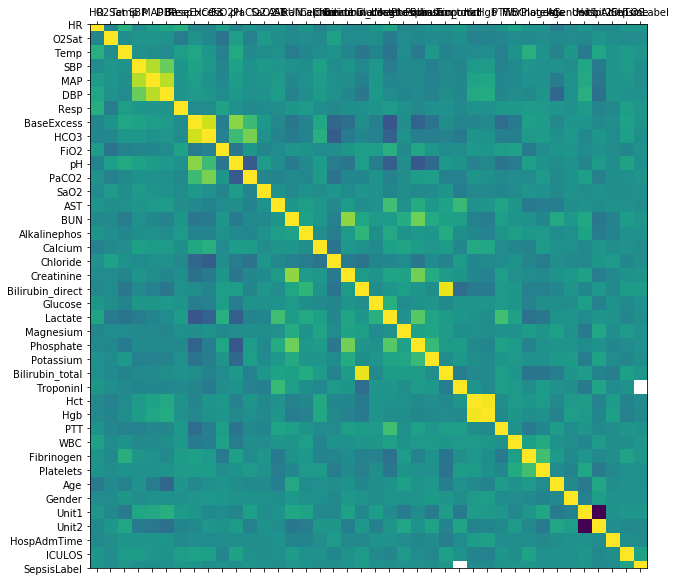

In [30]:
x=plot_corr(df,10)

In [37]:
F,p=stats.f_oneway(df)
### anova

In [38]:
x=df.columns

In [39]:
print(x)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')


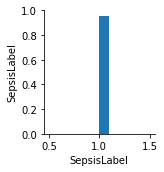

In [50]:
df1=df[['SepsisLabel']]
for i in x:
    df2=df[[i]]
    df3=pd.concat([df1,df2])
    x=df3.corr()
    
    

In [52]:
import seaborn as sns

In [58]:
corr=df.corr().SepsisLabel
print(corr)

HR                  0.050608
O2Sat              -0.010649
Temp                0.043201
SBP                -0.001793
MAP                -0.003563
DBP                 0.008218
Resp                0.057225
BaseExcess          0.034737
HCO3               -0.001390
FiO2                0.030938
pH                  0.001997
PaCO2               0.033266
SaO2                0.007780
AST                -0.020958
BUN                 0.044329
Alkalinephos        0.027834
Calcium            -0.020303
Chloride           -0.013332
Creatinine          0.032583
Bilirubin_direct    0.101815
Glucose             0.011145
Lactate            -0.000045
Magnesium           0.009500
Phosphate           0.014107
Potassium          -0.003570
Bilirubin_total     0.061783
TroponinI                NaN
Hct                -0.026740
Hgb                -0.042683
PTT                 0.030585
WBC                 0.042430
Fibrinogen          0.058971
Platelets           0.005482
Age                 0.000887
Gender        

In [57]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [84]:

y=df['Bilirubin_direct'].values
X=df['Bilirubin_total'].values





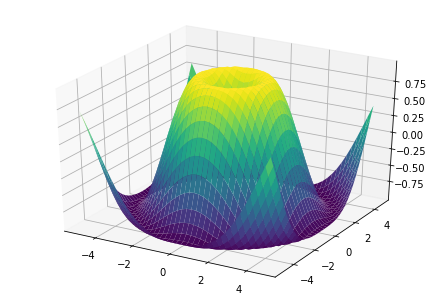

In [85]:

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()